<a href="https://colab.research.google.com/github/NatnaelTDaba/Object-Detection/blob/master/xView_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/UCF/data_utilities/')

In [ ]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline
from PIL import Image, ImageDraw # to read images
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


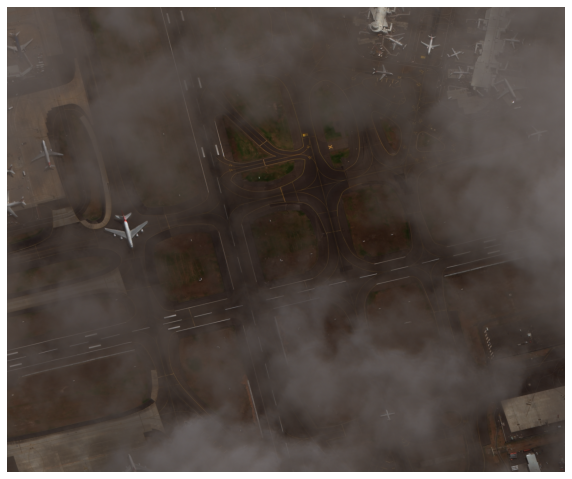

In [ ]:
#Load an image
chip_name = '../train_images/2523.tif'
arr = wv.get_image(chip_name)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [ ]:
#Loading our labels
coords, chips, classes = wv.get_labels('../xView_train.geojson')
classes = classes[chips=='2523.tif'].astype(np.int64)
coords = coords[chips=='2523.tif']

100%|██████████| 601937/601937 [00:03<00:00, 195025.75it/s]


In [ ]:
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

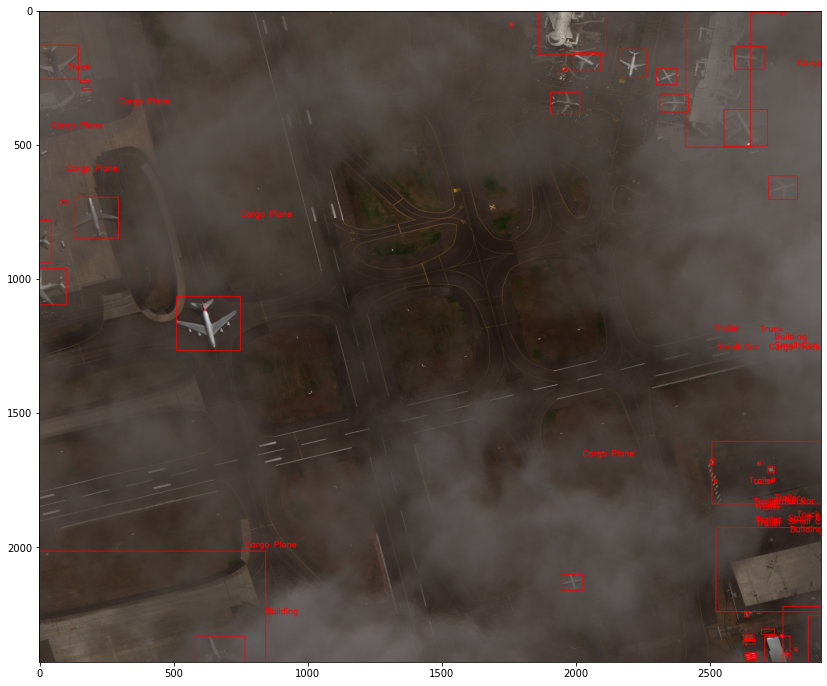

In [ ]:
img_orig = np.array(Image.open(chip_name))
img = img_orig.copy()
plt.figure(figsize=(14,14))

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0) 
thickness = 2
extracted_images = []
for i in range(len(coords)):
  img2 = cv2.rectangle(img, (int(coords[i][0]), int(coords[i][1])), (int(coords[i][2]), int(coords[i][3])), (255,0,0),2)  
  img2 = cv2.putText(img2, labels[classes[i]], (int(coords[i][2]), int(coords[i][3])-500), font,  
                   fontScale, color, thickness, cv2.LINE_AA)
  
  extracted_images.append((labels[classes[i]], img_orig[int(coords[i][1]):int(coords[i][3])+10, int(coords[i][0]):int(coords[i][2])+10]))
plt.imshow(img)

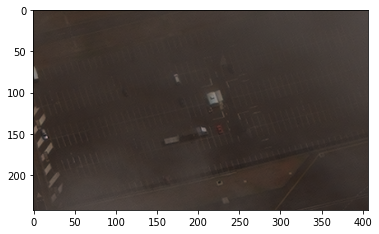

In [ ]:
plt.imshow(extracted_images[21][1])

In [ ]:
[extracted_images[i][1].shape for i in range(len(extracted_images))]

[(414, 0, 3),
 (15, 11, 3),
 (14, 12, 3),
 (13, 11, 3),
 (23, 24, 3),
 (22, 13, 3),
 (15, 9, 3),
 (17, 16, 3),
 (10, 17, 3),
 (97, 94, 3),
 (7, 13, 3),
 (12, 8, 3),
 (12, 10, 3),
 (13, 9, 3),
 (10, 35, 3),
 (10, 35, 3),
 (12, 31, 3),
 (16, 40, 3),
 (173, 48, 3),
 (0, 251, 3),
 (0, 242, 3),
 (233, 407, 3),
 (14, 16, 3),
 (202, 238, 3),
 (152, 167, 3),
 (14, 45, 3),
 (20, 49, 3),
 (135, 0, 3),
 (67, 108, 3),
 (86, 114, 3),
 (155, 0, 3),
 (105, 99, 3),
 (314, 392, 3),
 (97, 185, 3),
 (12, 41, 3),
 (14, 35, 3),
 (69, 100, 3),
 (136, 162, 3),
 (58, 79, 3),
 (13, 36, 3),
 (15, 39, 3),
 (80, 109, 3),
 (60, 77, 3),
 (127, 0, 3),
 (88, 107, 3),
 (208, 142, 3),
 (12, 40, 3)]

In [ ]:
im = Image.fromarray(extracted_images[44][1])
im.save("demo.jpg")

In [ ]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [ ]:
labels[12]

'Small Aircraft'

In [ ]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Small Car', 'Bus', 'Truck', 'Cargo Truck', 'Trailer', 'Scraper/Tractor', 'Shed', 'Building', 'Damaged Building']


In [ ]:
#We can chip the image into 500x500 chips
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=(500,500))
print("Num Chips: %d" % c_img.shape[0])

Num Chips: 30


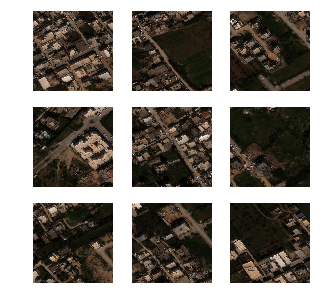

In [ ]:
#We can plot some of the chips
fig,ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(5)

for k in range(9):
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(c_img[np.random.choice(range(c_img.shape[0]))])

plt.show()

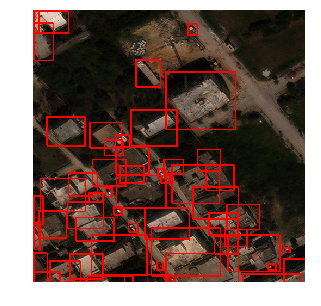

In [ ]:
#We can visualize the chips with their labels
ind = np.random.choice(range(c_img.shape[0]))
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)

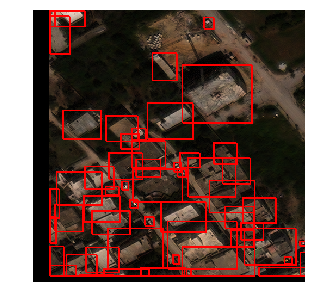

In [ ]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a1)

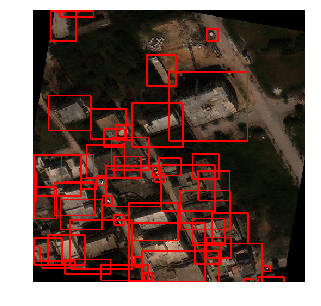

In [ ]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a2)

In [ ]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery